# Fine-Tuning P.1203 Model

# ITU-T P.1203

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from itu_p1203_new import P1203Standalone
from itu_p1203_new import P1203Pq
from itu_p1203_new import P1203Pa
from itu_p1203_new import P1203Pv
from itertools import permutations

import json


/home/shivi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
f = open("./mode0-newtests.json")
input_data = json.load(f)
input_data

{'I11': {'segments': [], 'streamId': 42},
 'I13': {'segments': [{'bitrate': 691.72,
    'codec': 'h264',
    'start': 0,
    'duration': 20,
    'fps': 25.0,
    'resolution': '1920x1080'}],
  'streamId': 42},
 'I23': {'stalling': [], 'streamId': 42},
 'IGen': {'device': 'pc',
  'displaySize': '1920x1080',
  'viewingDistance': '200cm'}}

In [3]:
#bitratesMbps = {
#    'BlueSpin': {'r01': 1.75, 'r02': 2.29, 'r03': 3.17, 'r04': 7.53, 'r05': 12.62},
#    'CasualSquat':  {'r01': 2.50, 'r02': 3.91, 'r03': 6.66, 'r04': 19.51, 'r05': 31.11},
#    'ReadyForWinter':  {'r01': 1.97, 'r02': 2.58, 'r03': 3.61, 'r04': 9.34, 'r05': 16.59},
#    'FlowerDance':  {'r01': 2.66, 'r02': 4.24, 'r03': 7.12, 'r04': 22.81, 'r05': 39.35},
#}

bitrates_kbps_new = {
    'BlueSpin': {'r01': 14000.33, 'r02': 18358.77, 'r03': 25381.74, 'r04': 60218.56, 'r05': 100957.13},
    'CasualSquat':  {'r01': 20028.41, 'r02': 31350.91, 'r03': 53280.41, 'r04': 156102.30, 'r05': 248934.89},
    'ReadyForWinter': { 'r01': 15823.20, 'r02': 20687.30, 'r03': 28919.76, 'r04': 74742.73, 'r05': 132748.28 },
    'FlowerDance': { 'r01': 21305.45,  'r02': 33934.77,  'r03': 57028.55, 'r04': 182492.95, 'r05': 314833.07}
}

resolution_map = {
    'r01': '640x360', # worse than 420p
    'r02': '852x480', # exactly 480p
    'r03': '1192x672', # bit worse than 720p
    'r04': '1533x864', # a bit better than 720p
    'r05': '1920x1080', # exactly 1080p

}

In [4]:
p1203_results = {
    'object': [],
    'qual': [],
    'bitrate': [],
    'p1203_qoe': []
}

for video in list(bitrates_kbps_new.keys()):
    bitrates = list(bitrates_kbps_new[video].values())
    qualities = list(bitrates_kbps_new[video].keys())
    
    for bitrate, quality in zip(bitrates, qualities):
        p1203_results['object'].append(video)
        p1203_results['qual'].append(quality)
        p1203_results['bitrate'].append(bitrate)

        input_data['I13']['segments'][0]['bitrate'] = bitrate
        input_data['I13']['segments'][0]['resolution'] = resolution_map[quality]
        # print(input_data)
        p1203_results['p1203_qoe'].append(P1203Standalone(input_data).calculate_complete()['O46'])

# p1203_results

In [5]:
p1203_df = pd.DataFrame.from_dict(p1203_results)
p1203_df

,object,qual,bitrate,p1203_qoe
0,BlueSpin,r01,14000.33,3.585273
1,BlueSpin,r02,18358.77,4.385775
2,BlueSpin,r03,25381.74,4.837059
3,BlueSpin,r04,60218.56,4.902406
4,BlueSpin,r05,100957.13,4.895940
5,CasualSquat,r01,20028.41,3.606240
6,CasualSquat,r02,31350.91,4.418385
7,CasualSquat,r03,53280.41,4.837059
8,CasualSquat,r04,156102.30,4.895940
9,CasualSquat,r05,248934.89,4.895940


In [6]:
p1203_df_1 = p1203_df.loc[p1203_df['object'].isin(['BlueSpin', 'CasualSquat'])]
grouped_p1203_qoe = p1203_df_1.groupby(['object', 'qual'])
grouped_p1203_qoe = grouped_p1203_qoe.mean()
grouped_p1203_qoe


bitrate  p1203_qoe
object      qual                      
BlueSpin    r01    14000.33   3.585273
            r02    18358.77   4.385775
            r03    25381.74   4.837059
            r04    60218.56   4.902406
            r05   100957.13   4.895940
CasualSquat r01    20028.41   3.606240
            r02    31350.91   4.418385
            r03    53280.41   4.837059
            r04   156102.30   4.895940
            r05   248934.89   4.895940

In [7]:
p1203_qoe = list(grouped_p1203_qoe['p1203_qoe'])
p1203_qoe

[3.5852729216386914,
 4.385774763876961,
 4.837058584633231,
 4.902406042629377,
 4.895940183337771,
 3.606240011756261,
 4.418384824796811,
 4.837058584633231,
 4.895940183337771,
 4.895940183337771]

In [8]:
import pandas as pd
import numpy as np
# get input data
ground_truth_df = pd.read_csv('./results/new-tests/individual_opinion_score_vpcc.csv')
ground_truth_df

,ID,objects,rate
0,1,BlueSpin_VPCC_r01_d200,1
1,1,FlowerDance_VPCC_r03_d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3
3,1,BlueSpin_VPCC_r05_d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3
...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2
816,41,BlueSpin_VPCC_r01_d200,2
817,41,BlueSpin_VPCC_r02_d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4


In [9]:
ground_truth_df[['object', 'encoder', 'qual', 'dist']] = ground_truth_df.objects.str.split('_', expand=True)
#df['object'] = df['object'].str.lower()
ground_truth_df['rate_scaled'] = ground_truth_df['rate'] # no need to scale it since this time we took 1-5 results
ground_truth_df

,ID,objects,rate,object,encoder,qual,dist,rate_scaled
0,1,BlueSpin_VPCC_r01_d200,1,BlueSpin,VPCC,r01,d200,1
1,1,FlowerDance_VPCC_r03_d200,2,FlowerDance,VPCC,r03,d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3,ReadyForWinter,VPCC,r03,d200,3
3,1,BlueSpin_VPCC_r05_d200,3,BlueSpin,VPCC,r05,d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3,ReadyForWinter,VPCC,r05,d200,3
...,...,...,...,...,...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2,FlowerDance,VPCC,r01,d200,2
816,41,BlueSpin_VPCC_r01_d200,2,BlueSpin,VPCC,r01,d200,2
817,41,BlueSpin_VPCC_r02_d200,2,BlueSpin,VPCC,r02,d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4,ReadyForWinter,VPCC,r03,d200,4


In [10]:
ground_truth_df = ground_truth_df.loc[ground_truth_df['object'].isin(['BlueSpin', 'CasualSquat'])]
grouped_ground_truth = ground_truth_df.groupby(['object', 'qual'])
grouped_ground_truth = grouped_ground_truth.mean(numeric_only=True)

In [11]:
qoe_ground_truth = list(grouped_ground_truth['rate'])
qoe_ground_truth

[1.4390243902439024,
 2.097560975609756,
 2.658536585365854,
 3.268292682926829,
 3.341463414634146,
 1.853658536585366,
 2.5853658536585367,
 2.7804878048780486,
 3.4146341463414633,
 3.6097560975609757]

Text(0, 0.5, 'P1203 Mode 0')

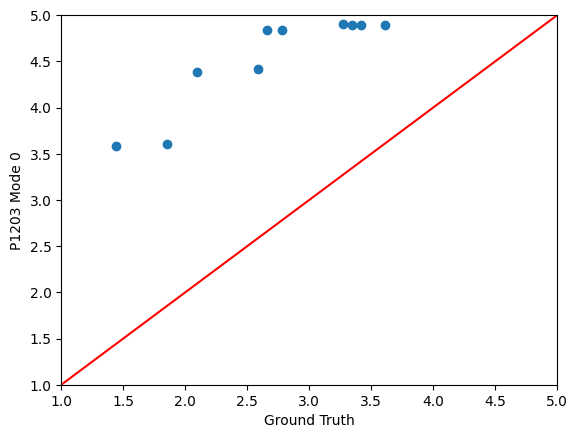

In [12]:
plt.scatter(qoe_ground_truth, p1203_qoe)
plt.plot([1, 5], [1, 5], color = 'red')
plt.axis([1, 5, 1, 5])
plt.xlabel("Ground Truth")
plt.ylabel("P1203 Mode 0")

Spearmann
              Ground truth    P.1203
Ground truth      1.000000  0.910877
P.1203            0.910877  1.000000


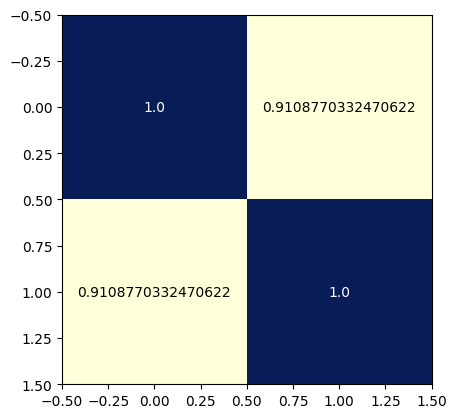

Pearson
              Ground truth    P.1203
Ground truth      1.000000  0.904375
P.1203            0.904375  1.000000


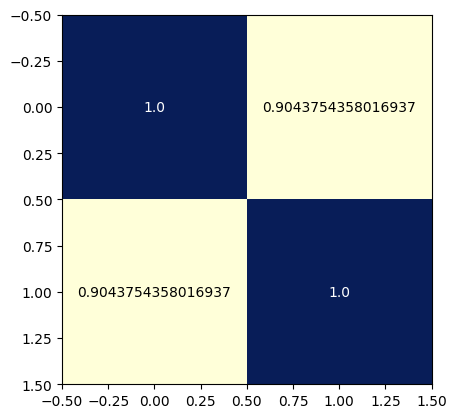

In [13]:
#import seaborn as sns
df_correlation = pd.DataFrame({'Ground truth': qoe_ground_truth,
                              'P.1203': p1203_qoe})

spear_corr = df_correlation.corr(method = 'spearman') #pearson
print("Spearmann")
print(spear_corr)

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(spear_corr, cmap='YlGnBu')

plt.text(0, 0, spear_corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
plt.text(1, 0, spear_corr['Ground truth']['P.1203'], ha = "center", va = "center", color = "black")
plt.text(0, 1, spear_corr['P.1203']['Ground truth'], ha = "center", va = "center", color = "black")
plt.text(1, 1, spear_corr['P.1203']['P.1203'], ha = "center", va = "center", color = "w")

plt.savefig("./figures/correlation_spearman_1203_1080p_NEWTESTS.pdf")
plt.show()

pearson_corr = df_correlation.corr(method = 'pearson') #spearman
print("Pearson")
print(pearson_corr)

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(pearson_corr, cmap='YlGnBu')

plt.text(0, 0, pearson_corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
plt.text(1, 0, pearson_corr['Ground truth']['P.1203'], ha = "center", va = "center", color = "black")
plt.text(0, 1, pearson_corr['P.1203']['Ground truth'], ha = "center", va = "center", color = "black")
plt.text(1, 1, pearson_corr['P.1203']['P.1203'], ha = "center", va = "center", color = "w")

plt.savefig("./figures/correlation_pearson_1203_1080p_NEWTESTS.pdf")
plt.show()



# P1203.1 Pv coefficients updates


In [14]:
# Quant(a1, a2, a3, a4) = a1 + a2*ln(a3+ln(bitrate) + ln(br*br/(codRes*fr) + a4))

# MOSq(q1, q2, q3) = q1 + q2*exp(q3*Quant)
# MOSq = max(min(MOSq, 5), 1)

# Dq = max(min(100 - RfromMOS(MOSq), 100), 0)

# MOSfromR:
#     MOS = MOS_min + (MOS_max - MOS_min) * R/100 + R*(R-60)(100-R)*0.000007
#     MOS = min(MOS_max, max(MOS, MOS_min))
#     Calculate MOSfromR, R from 0 -> 100, step 0.25

In [15]:
from functools import lru_cache
from itertools import permutations
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itu_p1203_new import P1203Standalone
from itu_p1203_new import P1203Pv


In [16]:
f = open("./mode0-newtests.json")
input_data = json.load(f)
# input_data

In [17]:
ground_truth_qoe_df = pd.read_csv('./results/new-tests/individual_opinion_score_vpcc.csv')
ground_truth_qoe_df[['object', 'encoder', 'qual', 'dist']] = ground_truth_qoe_df.objects.str.split('_', expand=True)
ground_truth_qoe_df['rate_scaled'] = ground_truth_qoe_df['rate']

ground_truth_qoe_df

,ID,objects,rate,object,encoder,qual,dist,rate_scaled
0,1,BlueSpin_VPCC_r01_d200,1,BlueSpin,VPCC,r01,d200,1
1,1,FlowerDance_VPCC_r03_d200,2,FlowerDance,VPCC,r03,d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3,ReadyForWinter,VPCC,r03,d200,3
3,1,BlueSpin_VPCC_r05_d200,3,BlueSpin,VPCC,r05,d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3,ReadyForWinter,VPCC,r05,d200,3
...,...,...,...,...,...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2,FlowerDance,VPCC,r01,d200,2
816,41,BlueSpin_VPCC_r01_d200,2,BlueSpin,VPCC,r01,d200,2
817,41,BlueSpin_VPCC_r02_d200,2,BlueSpin,VPCC,r02,d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4,ReadyForWinter,VPCC,r03,d200,4


In [18]:
ground_truth_qoe_df = ground_truth_qoe_df[['object', 'qual', 'rate_scaled']]
ground_truth_qoe_df

,object,qual,rate_scaled
0,BlueSpin,r01,1
1,FlowerDance,r03,2
2,ReadyForWinter,r03,3
3,BlueSpin,r05,3
4,ReadyForWinter,r05,3
...,...,...,...
815,FlowerDance,r01,2
816,BlueSpin,r01,2
817,BlueSpin,r02,2
818,ReadyForWinter,r03,4


In [19]:
# remove outliers using boxplot method
vpcc_group_columns = ['object', 'qual']
configurations = ground_truth_qoe_df.groupby(vpcc_group_columns)

def boxplot_outlier_filter(frame):
    """
    Outlier filter using interquantile range (filter below Q1 - 1.5 IQR and above Q3 + 1.5 IQR)

    :param frame: data frame
    :return: filtered frame
    """
    q1 = frame.quantile(0.25, numeric_only=True)["rate_scaled"]
    q3 = frame.quantile(0.75, numeric_only=True)["rate_scaled"]
    
    # interquantile range
    iqr = q3 - q1
    fence_low = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)
    filtered = (frame["rate_scaled"] >= fence_low) & (frame["rate_scaled"] <= fence_high)
    return frame.loc[filtered]

# for each configuration, filter outliers
df_vpcc_filtered = None
for _, frame in configurations:
    #print(boxplot_outlier_filter(frame))
    df_vpcc_filtered = pd.concat([df_vpcc_filtered, boxplot_outlier_filter(frame)], axis=0)

df_vpcc_filtered = df_vpcc_filtered.reset_index(drop=True)
# groups = df_vpcc_filtered.groupby(vpcc_group_columns)


In [20]:
ground_truth_qoe_df = df_vpcc_filtered.loc[df_vpcc_filtered['object'].isin(['BlueSpin', 'CasualSquat'])]
ground_truth_qoe_grouped_df = ground_truth_qoe_df.groupby(['object', 'qual']).aggregate(lambda x: tuple(x))
ground_truth_qoe_grouped_df

rate_scaled
object      qual                                                   
BlueSpin    r01   (1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, ...
            r02   (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
            r03   (2, 3, 2, 2, 3, 3, 2, 4, 2, 2, 3, 4, 2, 3, 3, ...
            r04   (3, 4, 2, 2, 5, 3, 4, 5, 3, 4, 3, 4, 3, 3, 5, ...
            r05   (3, 4, 2, 3, 4, 4, 4, 5, 3, 3, 4, 3, 3, 4, 4, ...
CasualSquat r01   (1, 2, 2, 2, 3, 2, 1, 2, 1, 1, 3, 2, 3, 1, 2, ...
            r02   (2, 3, 1, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, ...
            r03   (2, 3, 2, 3, 4, 3, 2, 2, 2, 2, 4, 3, 2, 4, 3, ...
            r04   (2, 4, 3, 3, 3, 4, 4, 4, 2, 2, 4, 3, 2, 3, 5, ...
            r05   (3, 4, 3, 3, 4, 4, 2, 4, 3, 4, 4, 4, 2, 3, 4, ...

In [21]:
#bitratesMbps = {
#    'BlueSpin': {'r01': 1.75, 'r02': 2.29, 'r03': 3.17, 'r04': 7.53, 'r05': 12.62},
#    'CasualSquat':  {'r01': 2.50, 'r02': 3.91, 'r03': 6.66, 'r04': 19.51, 'r05': 31.11},
#    'ReadyForWinter':  {'r01': 1.97, 'r02': 2.58, 'r03': 3.61, 'r04': 9.34, 'r05': 16.59},
#    'FlowerDance':  {'r01': 2.66, 'r02': 4.24, 'r03': 7.12, 'r04': 22.81, 'r05': 39.35},
#}

bitrates_kbps_new = {
    'BlueSpin': {'r01': 14000.33, 'r02': 18358.77, 'r03': 25381.74, 'r04': 60218.56, 'r05': 100957.13},
    'CasualSquat':  {'r01': 20028.41, 'r02': 31350.91, 'r03': 53280.41, 'r04': 156102.30, 'r05': 248934.89},
    'ReadyForWinter': { 'r01': 15823.20, 'r02': 20687.30, 'r03': 28919.76, 'r04': 74742.73, 'r05': 132748.28 },
    'FlowerDance': { 'r01': 21305.45,  'r02': 33934.77,  'r03': 57028.55, 'r04': 182492.95, 'r05': 314833.07}
}
resolution_map = {
    'r01': '640x360', # worse than 480p
    'r02': '852x480', # exactly 480p
    'r03': '1192x672', # bit worse than 720p
    'r04': '1533x864', # a bit better than 720p
    'r05': '1920x1080', # exactly 1080p

}

In [22]:
def calculate_p1203(coeffs):

    p1203_results = {
        'object': [],
        'qual': [],
        'bitrate': [],
        'p1203_qoe': []
    }

    for video in list(bitrates_kbps_new.keys()):
        bitrates = list(bitrates_kbps_new[video].values())
        qualities = list(bitrates_kbps_new[video].keys())
        
        for bitrate, quality in zip(bitrates, qualities):
            p1203_results['object'].append(video)
            p1203_results['qual'].append(quality)
            p1203_results['bitrate'].append(bitrate)

            input_data['I13']['segments'][0]['bitrate'] = bitrate
            input_data['I13']['segments'][0]['resolution'] = resolution_map[quality]

            #print("input data")
            #print(input_data)
            
            qoe_p1203 = P1203Standalone(input_data, coeffs=coeffs).calculate_complete()['O46']
            
            p1203_results['p1203_qoe'].append(qoe_p1203)

    return p1203_results

In [23]:
def calculate_rmse(p1203_results, mos):
    joined_qoe = p1203_results.join(mos)
    rmse_arr = []
    #print("joined_qoe")
    #print(joined_qoe)

    for idx in np.arange(joined_qoe.shape[0]):
        
        #print("joined_qoe.shape[0]")
        #print(joined_qoe.shape[0])
        targets = joined_qoe.iloc[idx,:]['rate_scaled']
        #print("targets")
        #print(targets)
        #print(len(targets))
        predictions = np.full(len(targets), joined_qoe.loc[joined_qoe.index[idx], 'p1203_qoe'])
        #print("predictions")
        #print(predictions)
        #print(len(predictions))
        rmse_arr.append(np.sqrt(np.mean((predictions-targets)**2)))
        #print("rmse_arr")
        #print(rmse_arr)
    
    return np.average(rmse_arr)


In [24]:
from datetime import datetime

_COEFFS = {
        "u1": 72.61,
        "u2": 0.32,
        "t1": 30.98,
        "t2": 1.29,
        "t3": 64.65,
        "q1": 4.66,
        "q2": -0.07,
        "q3": 4.06,
        "mode0": {
            "a1": 11.9983519,
            "a2": -2.99991847,
            "a3": 41.2475074001,
            "a4": 0.13183165961,
        },
        "mode1": {
            "a1": 5.00011566,
            "a2": -1.19630824,
            "a3": 41.3585049,
            "a4": 0,
            "c0": -0.91562479,
            "c1": 0,
            "c2": -3.28579526,
            "c3": 20.4098663,
        },
        "htv_1": -0.60293,
        "htv_2": 2.12382,
        "htv_3": -0.36936,
        "htv_4": 0.03409,
    }

def finetune_coeffs():
    min_rmse = sys.float_info.max
    optimized_coeffs = _COEFFS
    optimized_p1203_qoe  =[]

    # for _COEFFS['u1'] in np.arange(50,100):
    #     for _COEFFS['u2'] in np.arange(1):
            # for _COEFFS['t1'] in np.arange(1):
            #     for _COEFFS['t2'] in np.arange(1):
            #         for _COEFFS['t3'] in np.arange(1):
                        # for _COEFFS['q1'] in np.arange(1):
                        #     for _COEFFS['q2'] in np.arange(1):
                        #         for _COEFFS['q3'] in np.arange(1):
    for _COEFFS['mode0']['a1'] in np.arange(1, 15, 0.5): # 0.5 range originally
        for _COEFFS['mode0']['a2'] in np.arange(-5, 0, 0.5): # 0.5 range originally
            for _COEFFS['mode0']['a3'] in np.arange(0, 80, 1): # 1 range originally
                for _COEFFS['mode0']['a4'] in np.arange(0, 5, 0.5): # 0.5 range originally
                    # print(_COEFFS)

                    qoe_p1203_dict = calculate_p1203(_COEFFS)
                    p1203_df = pd.DataFrame.from_dict(qoe_p1203_dict)

                    # Fine tune aka train with BlueSpin and CasualSquat
                    p1203_df = p1203_df.loc[p1203_df['object'].isin(['BlueSpin', 'CasualSquat'])]
                    grouped_p1203_qoe = p1203_df.groupby(['object', 'qual']).mean()
                    #print("grouped_p1203_qoe")
                    #print(grouped_p1203_qoe)

                    print("timestamp")
                    print(datetime.now())
                    print("COEFFS: " + str(_COEFFS['mode0']['a1']) + " " + str(_COEFFS['mode0']['a2']) + " " + str(_COEFFS['mode0']['a3']) + " " + str(_COEFFS['mode0']['a4']))

                    rmse = calculate_rmse(grouped_p1203_qoe, ground_truth_qoe_grouped_df)
                    print("Calcd RMSE: " + str(rmse))
                    print("Current min RMSE: " + str(min_rmse))
                    if rmse < min_rmse:   
                        print("==> NEW MIN RMSE: " + str(rmse))
                        print("==> MIN RMSE _COEFFS: " + str(_COEFFS))
                        
                        optimized_coeffs = _COEFFS
                        min_rmse = rmse
                        optimized_p1203_qoe = list(grouped_p1203_qoe['p1203_qoe'])

    return optimized_coeffs, optimized_p1203_qoe, min_rmse

In [25]:
from scipy.optimize import minimize, Bounds, differential_evolution, basinhopping

# objective function to minimise
def objective_function(trial_coeffs, multiplier=1):
    current_coeffs = _COEFFS
    current_coeffs['mode0']['a1'] = trial_coeffs[0]
    current_coeffs['mode0']['a2'] = trial_coeffs[1]
    current_coeffs['mode0']['a3'] = trial_coeffs[2]
    current_coeffs['mode0']['a4'] = trial_coeffs[3]

    qoe_p1203_dict = calculate_p1203(current_coeffs)
    p1203_df = pd.DataFrame.from_dict(qoe_p1203_dict)
    p1203_df = p1203_df.loc[p1203_df['object'].isin(['BlueSpin', 'CasualSquat'])]
    grouped_p1203_qoe = p1203_df.groupby(['object', 'qual']).mean()
    print("COEFFS: " + str(current_coeffs['mode0']['a1']) + " " + str(current_coeffs['mode0']['a2']) + " " + str(current_coeffs['mode0']['a3']) + " " + str(current_coeffs['mode0']['a4']))

    rmse = calculate_rmse(grouped_p1203_qoe, ground_truth_qoe_grouped_df)
    print("Calcd RMSE: " + str(rmse))
    #print("Current min RMSE: " + str(min_rmse))
    return rmse

initial_coeffs = [12,-3,41,0]

bounds = [(1,15), (-5, 5), (0, 80), (0, 5)]
#bounds = [(0,100), (0,100), (0,100), (0,100)]
#bounds = [(-100,100), (-100,100), (-100,100), (-100,100)]
#bounds = Bounds(-100,100)

result2 = basinhopping(objective_function, initial_coeffs, minimizer_kwargs={'bounds':bounds, 'method':'L-BFGS-B'})
print("optimised coeffs basinhopping:" + str(result2.x))
print("objective funciton value:" + str(result2.fun))



COEFFS: 12.0 -3.0 41.0 0.0
Calcd RMSE: 1.9998447319892443
COEFFS: 12.00000001 -3.0 41.0 0.0
Calcd RMSE: 1.9998447305913252
COEFFS: 12.0 -2.99999999 41.0 0.0
Calcd RMSE: 1.9998447263938632
COEFFS: 12.0 -3.0 41.00000001 0.0
Calcd RMSE: 1.999844732065858
COEFFS: 12.0 -3.0 41.0 1e-08
Calcd RMSE: 1.9998447319909787
COEFFS: 12.139791899813483 -2.4404618918609016 40.99233861799449 0.0
Calcd RMSE: 1.1278707996569666
COEFFS: 12.139791909813484 -2.4404618918609016 40.99233861799449 0.0
Calcd RMSE: 1.1278707996569666
COEFFS: 12.139791899813483 -2.4404618818609016 40.99233861799449 0.0
Calcd RMSE: 1.1278707996569666
COEFFS: 12.139791899813483 -2.4404618918609016 40.99233862799449 0.0
Calcd RMSE: 1.1278707996569666
COEFFS: 12.139791899813483 -2.4404618918609016 40.99233861799449 1e-08
Calcd RMSE: 1.1278707996569666
COEFFS: 12.371783768442947 -2.219570320711471 41.02991115940029 0.327935517719653
Calcd RMSE: 1.1278707996569666
COEFFS: 12.371783778442948 -2.219570320711471 41.02991115940029 0.3279355

In [ ]:
#result = minimize(objective_function, initial_coeffs, method='L-BFGS-B', bounds=bounds)
result = differential_evolution(objective_function, bounds, strategy='rand2bin', disp=True, workers=-1)

print("Optimized coefficients:", str(result.x))
print("Objective function value:", str(result.fun))


/home/shivi/.local/lib/python3.10/site-packages/scipy/optimize/_differentialevolution.py:488: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


COEFFS: 9.439763469498075 1.0139140789435974 26.938070455325303 4.8780802919174455COEFFS: 6.0406602135005425 -3.163731521593446 76.49975143410775 1.3610980328704445COEFFS: 9.758678161178372 0.07239111146475907 41.18195016773862 4.507852847191538

COEFFS: 2.223940183434184 0.4442773656447052 51.71773671403113 1.980538686716593COEFFS: 3.350868455379783 3.9444462335075494 44.27390431074009 4.137890206820365
COEFFS: 10.772217965823373 -3.297085597804129 62.80577172361379 3.018809035157008COEFFS: 14.71677055206926 1.2723770874827822 37.379481088167694 3.906107341905124COEFFS: 12.265723517164261 -0.9254850122644598 16.21417156444452 4.670788384895457COEFFS: 9.902102276956697 2.238740827704686 14.699522028916114 0.6611083744178292COEFFS: 13.765416217659313 1.5200570535374336 43.5821430482396 1.2511406343415785COEFFS: 2.472184382039331 2.343956917120856 54.38847270844758 3.9790991179772246COEFFS: 13.354082942830765 4.8442814922682285 48.9914649929821 1.4337333364249305COEFFS: 10.26917943639144

In [ ]:
print("Optimized coefficients differential evolution:", result.x)
print("Objective function value  differential evolution:", result.fun)
print("Optimization message  differential evolution:", result.message)
print("optimised coeffs basinhopping:" + result2.x)
print("objective funciton value basinhopping:" + result2.fun)

In [271]:
#optimized_coeffs, p1203_qoe_list, min_rmse =  finetune_coeffs()
#print("timestamp")
#print(datetime.now())
#print("FINAL RESULT")
#print(optimized_coeffs, p1203_qoe_list, min_rmse)

In [272]:
#print(min_rmse)
#print(optimized_coeffs)
#print(ground_truth_qoe_df.groupby(['object', 'qual']).mean()['rate_scaled'])


In [273]:
#==============================================================================================================================
#FOUND THE BEST

In [274]:
ground_truth_qoe_list = list(ground_truth_qoe_df.groupby(['object', 'qual']).mean()['rate_scaled'])
ground_truth_qoe_list = ground_truth_qoe_list

In [ ]:
#coeffs = {'u1': 72.61, 'u2': 0.32, 't1': 30.98, 't2': 1.29, 't3': 64.65, 'q1': 4.4, 'q2': -1.5, 'q3': 1.5, 'mode0': {'a1': 5, 'a2': -1.0, 'a3': 130, 'a4': 4.0}, 'mode1': {'a1': 5.00011566, 'a2': -1.19630824, 'a3': 41.3585049, 'a4': 0, 'c0': -0.91562479, 'c1': 0, 'c2': -3.28579526, 'c3': 20.4098663}, 'htv_1': -0.60293, 'htv_2': 2.12382, 'htv_3': -0.36936, 'htv_4': 0.03409}
coeffs = _COEFFS

print(result.x[0])
print(result.x[1])
print(result.x[2])
print(result.x[3])

coeffs['mode0']['a1'] = result.x[0]
coeffs['mode0']['a2'] = result.x[1]
coeffs['mode0']['a3'] = result.x[2]
coeffs['mode0']['a4'] = result.x[3]
   

#coeffs = {'u1': 72.61, 'u2': 0.32, 't1': 30.98, 't2': 1.29, 't3': 64.65, 'q1': 4.66, 'q2': -0.07, 'q3': 4.06, 'mode0': {'a1': np.float64(3.0), 'a2': np.float64(-0.5), 'a3': np.int64(65), 'a4': np.float64(0.0)}, 'mode1': {'a1': 5.00011566, 'a2': -1.19630824, 'a3': 41.3585049, 'a4': 0, 'c0': -0.91562479, 'c1': 0, 'c2': -3.28579526, 'c3': 20.4098663}, 'htv_1': -0.60293, 'htv_2': 2.12382, 'htv_3': -0.36936, 'htv_4': 0.03409}

#coeffs = optimized_coeffs
print(coeffs)

qoe_p1203_dict = calculate_p1203(coeffs)
p1203_df = pd.DataFrame.from_dict(qoe_p1203_dict)

p1203_df = p1203_df.loc[p1203_df['object'].isin(['BlueSpin', 'CasualSquat'])]
grouped_p1203_qoe = p1203_df.groupby(['object', 'qual']).mean()
grouped_p1203_qoe

In [ ]:
p1203_qoe_list = list(grouped_p1203_qoe['p1203_qoe'])
plt.scatter(ground_truth_qoe_list, p1203_qoe_list)
plt.plot([1, 5], [1, 5], color = 'red')
plt.axis([1, 5, 1, 5])
plt.xlabel("Ground Truth")
plt.ylabel("Fine-tuned P1203 Mode 0")

In [ ]:
#import seaborn as sns

df_correlation = pd.DataFrame({
    "Ground truth": ground_truth_qoe_list,
    "P.1203": p1203_qoe_list
})

#corr_method = 'spearman'
#corr = df_correlation.corr(method=corr_method)
#sns.heatmap(corr, cmap='YlGnBu', annot = True)
#plt.savefig('./figures/correlation_heatmap_' + corr_method + '_optimized.pdf')
#plt.show()

spear_corr = df_correlation.corr(method = 'spearman') #pearson
print("Spearmann")
print(spear_corr)
print(spear_corr.shape)
print(spear_corr["Ground truth"]["P.1203"])

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(spear_corr, cmap='YlGnBu')

plt.text(0, 0, spear_corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
plt.text(1, 0, spear_corr['Ground truth']['P.1203'], ha = "center", va = "center", color = "black")
plt.text(0, 1, spear_corr['P.1203']['Ground truth'], ha = "center", va = "center", color = "black")
plt.text(1, 1, spear_corr['P.1203']['P.1203'], ha = "center", va = "center", color = "w")


plt.savefig("./figures/correlation_spearman_optimized_NEWTESTS.pdf")
plt.show()

pearson_corr = df_correlation.corr(method = 'pearson') #spearman
print("Pearson")
print(pearson_corr)

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(pearson_corr, cmap='YlGnBu')

plt.text(0, 0, pearson_corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
plt.text(1, 0, pearson_corr['Ground truth']['P.1203'], ha = "center", va = "center", color = "black")
plt.text(0, 1, pearson_corr['P.1203']['Ground truth'], ha = "center", va = "center", color = "black")
plt.text(1, 1, pearson_corr['P.1203']['P.1203'], ha = "center", va = "center", color = "w")


plt.savefig("./figures/correlation_pearson_optimized_NEWTESTS.pdf")
plt.show()


In [370]:
# corr_method = 'pearson'
# corr = df_correlation.corr(method=corr_method)
# sns.heatmap(corr, cmap='YlGnBu', annot = True)
# plt.savefig('./figures/correlation_heatmap_' + corr_method + '_optimized.pdf')
# plt.show()

In [371]:
#==============================================================================================================================
#VALIDATING with ReadyForWinter and FlowerDance

In [ ]:
#coeffs = {'u1': 72.61, 'u2': 0.32, 't1': 30.98, 't2': 1.29, 't3': 64.65, 'q1': 4.4, 'q2': -1.5, 'q3': 1.5, 'mode0': {'a1': 5, 'a2': -1.0, 'a3': 130, 'a4': 4.0}, 'mode1': {'a1': 5.00011566, 'a2': -1.19630824, 'a3': 41.3585049, 'a4': 0, 'c0': -0.91562479, 'c1': 0, 'c2': -3.28579526, 'c3': 20.4098663}, 'htv_1': -0.60293, 'htv_2': 2.12382, 'htv_3': -0.36936, 'htv_4': 0.03409}

qoe_p1203_dict = calculate_p1203(coeffs)
qoe_p1203_df = pd.DataFrame(qoe_p1203_dict)
qoe_p1203_df = qoe_p1203_df.loc[qoe_p1203_df['object'].isin(['ReadyForWinter', 'FlowerDance'])]
                                # & ((qoe_p1203_df['qual'].isin(['r01']) & qoe_p1203_df['end_quality'].isin(['r1'])) |
                                #  (qoe_p1203_df['start_quality'].isin(['r3']) & qoe_p1203_df['end_quality'].isin(['r3'])) |
                                #  (qoe_p1203_df['start_quality'].isin(['r5']) & qoe_p1203_df['end_quality'].isin(['r5']))) ]
qoe_validation = qoe_p1203_df.groupby(['object', 'qual']).mean()
qoe_validation

In [ ]:
# Get ground truth qoe for these sequences
ground_truth_qoe_df = df_vpcc_filtered.loc[df_vpcc_filtered['object'].isin(['ReadyForWinter', 'FlowerDance'])]
ground_truth_qoe_grouped_df = ground_truth_qoe_df.groupby(['object', 'qual']).aggregate(lambda x: tuple(x))
ground_truth_qoe_grouped_df

In [ ]:
calculate_rmse(qoe_validation, ground_truth_qoe_grouped_df)

In [ ]:
ground_truth_list = list(ground_truth_qoe_df.groupby(['object', 'qual']).mean()['rate_scaled'])
qoe_validation_list = list(qoe_validation['p1203_qoe'])
ground_truth_list

In [ ]:
plt.scatter(ground_truth_list, qoe_validation_list)
plt.plot([1, 5], [1, 5], color='red')
plt.axis([1, 5, 1, 5])
plt.xlabel('Ground Truth')
plt.ylabel('Fine-tuned P1203 Mode 0 - Validation')
plt.show()

In [ ]:
corr_method = 'spearman'
corr_df = pd.DataFrame({
    'Fine-tuned P1203': qoe_validation_list,
    'Ground truth': ground_truth_list
})

corr_methods = ['spearman', 'pearson']

for corr_method in corr_methods:
    corr = corr_df.corr(method=corr_method)
    #sns.heatmap(corr, cmap='YlGnBu', annot = True)
    plt.imshow(corr, cmap='YlGnBu')

    plt.text(0, 0, corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
    plt.text(1, 0, corr['Ground truth']['Fine-tuned P1203'], ha = "center", va = "center", color = "black")
    plt.text(0, 1, corr['Fine-tuned P1203']['Ground truth'], ha = "center", va = "center", color = "black")
    plt.text(1, 1, corr['Fine-tuned P1203']['Fine-tuned P1203'], ha = "center", va = "center", color = "w")

    plt.savefig('./figures/correlation_heatmap_' + corr_method + '_validation_NEWTESTS.pdf')
    plt.title(corr_method)
    plt.show()

In [ ]:
# original P1203
_COEFFS = {
        "u1": 72.61,
        "u2": 0.32,
        "t1": 30.98,
        "t2": 1.29,
        "t3": 64.65,
        "q1": 4.66,
        "q2": -0.07,
        "q3": 4.06,
        "mode0": {
            "a1": 11.9983519,
            "a2": -2.99991847,
            "a3": 41.2475074001,
            "a4": 0.13183165961,
        },
        "mode1": {
            "a1": 5.00011566,
            "a2": -1.19630824,
            "a3": 41.3585049,
            "a4": 0,
            "c0": -0.91562479,
            "c1": 0,
            "c2": -3.28579526,
            "c3": 20.4098663,
        },
        "htv_1": -0.60293,
        "htv_2": 2.12382,
        "htv_3": -0.36936,
        "htv_4": 0.03409,
    }

qoe_p1203_dict = calculate_p1203(_COEFFS)
qoe_p1203_df = pd.DataFrame(qoe_p1203_dict)
qoe_p1203_df = qoe_p1203_df.loc[qoe_p1203_df['object'].isin(['ReadyForWinter', 'FlowerDance'])]
                                #  & 
                                # ((qoe_p1203_df['start_quality'].isin(['r1']) & qoe_p1203_df['end_quality'].isin(['r1'])) |
                                #  (qoe_p1203_df['start_quality'].isin(['r3']) & qoe_p1203_df['end_quality'].isin(['r3'])) |
                                #  (qoe_p1203_df['start_quality'].isin(['r5']) & qoe_p1203_df['end_quality'].isin(['r5']))) ]
qoe_original_p1203 = qoe_p1203_df.groupby(['object', 'qual']).mean()
qoe_original_p1203

In [ ]:
print(calculate_rmse(qoe_original_p1203, ground_truth_qoe_grouped_df))
qoe_original_p1203_list = list(qoe_original_p1203['p1203_qoe'])

In [ ]:
plt.scatter(ground_truth_list, qoe_original_p1203_list)
plt.plot([1, 5], [1, 5], color='red')
plt.axis([1, 5, 1, 5])
plt.xlabel('Ground Truth')
plt.ylabel('Original P1203 Mode 0')
plt.show()

In [ ]:
corr_all_df = pd.DataFrame({
    "Ground truth": ground_truth_list,
    # "Fine-tuned P1203": qoe_validation_list,
    "Original P1203": qoe_original_p1203_list
})

corr_methods = ['spearman', 'pearson']
for corr_method in corr_methods:
    corr = corr_all_df.corr(method=corr_method)
    #sns.heatmap(corr, cmap='YlGnBu', annot=True)
    plt.imshow(corr, cmap='YlGnBu')

    plt.text(0, 0, corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
    plt.text(1, 0, corr['Ground truth']['Original P1203'], ha = "center", va = "center", color = "black")
    plt.text(0, 1, corr['Original P1203']['Ground truth'], ha = "center", va = "center", color = "black")
    plt.text(1, 1, corr['Original P1203']['Original P1203'], ha = "center", va = "center", color = "w")
    
    plt.title(corr_method)
    plt.show()